In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 12)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Setting default number of Parallel threads to 12.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'ArchR_snATAC_DLPFC_neuron')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
proj <- addImputeWeights(proj, reducedDims = "HarmonyX60")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-457e4766551b-Date-2022-01-07_Time-11-21-12.log
If there is an issue, please report to github with logFile!

2022-01-07 11:21:13 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



## Check clusters w/ lower nFrag (dead cells) and doublets

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-457e733402e3-Date-2022-01-07_Time-11-22-06.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-457e733402e3-Date-2022-01-07_Time-11-22-06.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-457e7a3832d3-Date-2022-01-07_Time-11-22-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-457e7a3832d3-Date-2022-01-07_Time-11-22-08.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-457e5a235575-Date-2022-01-07_Time-11-22-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : Arch

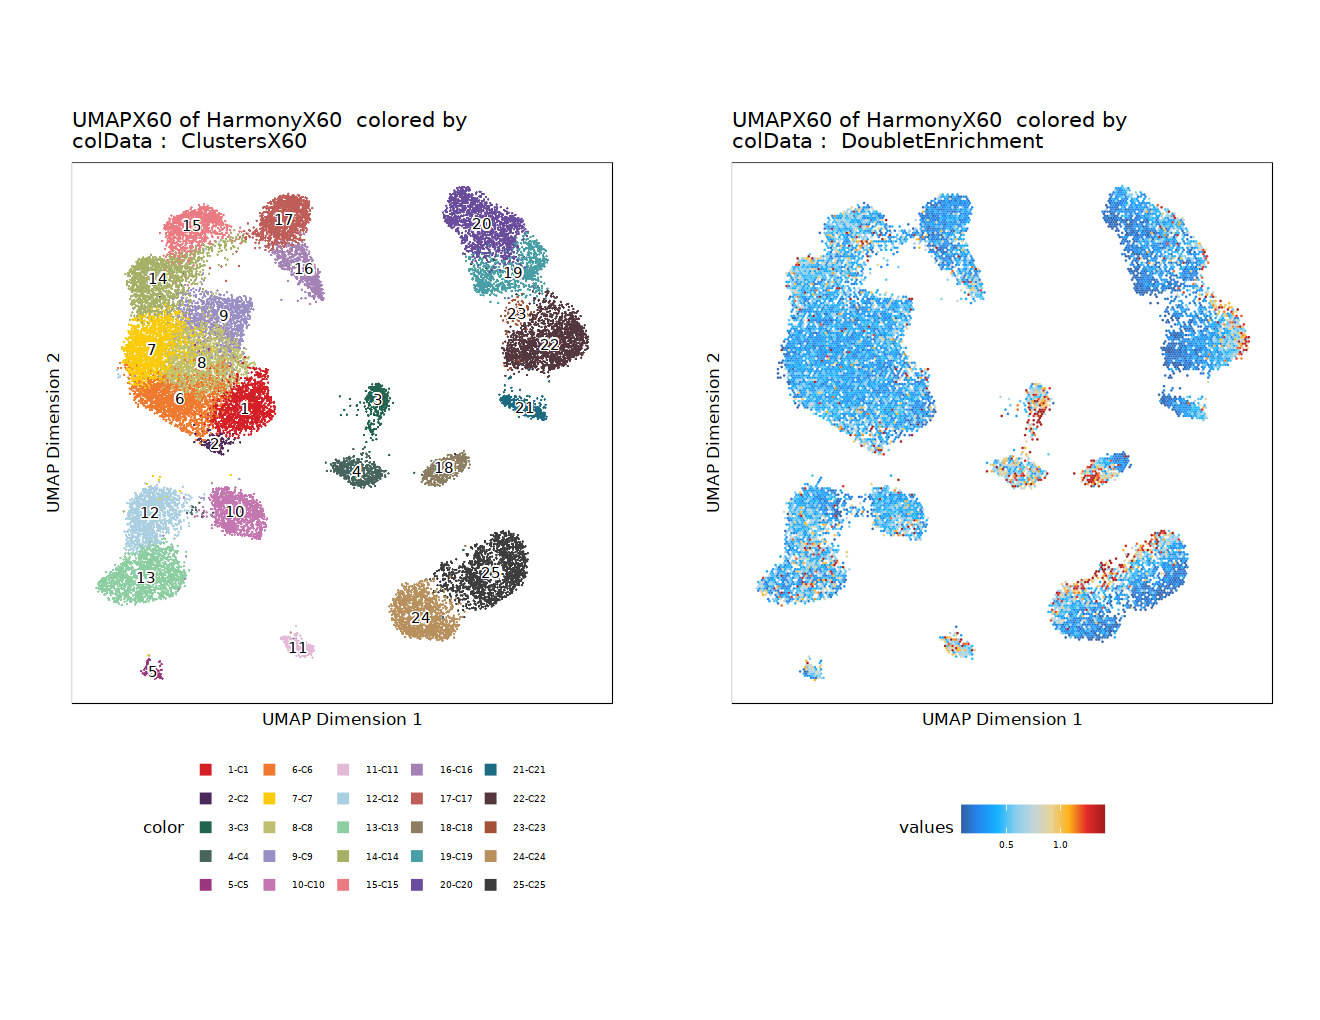

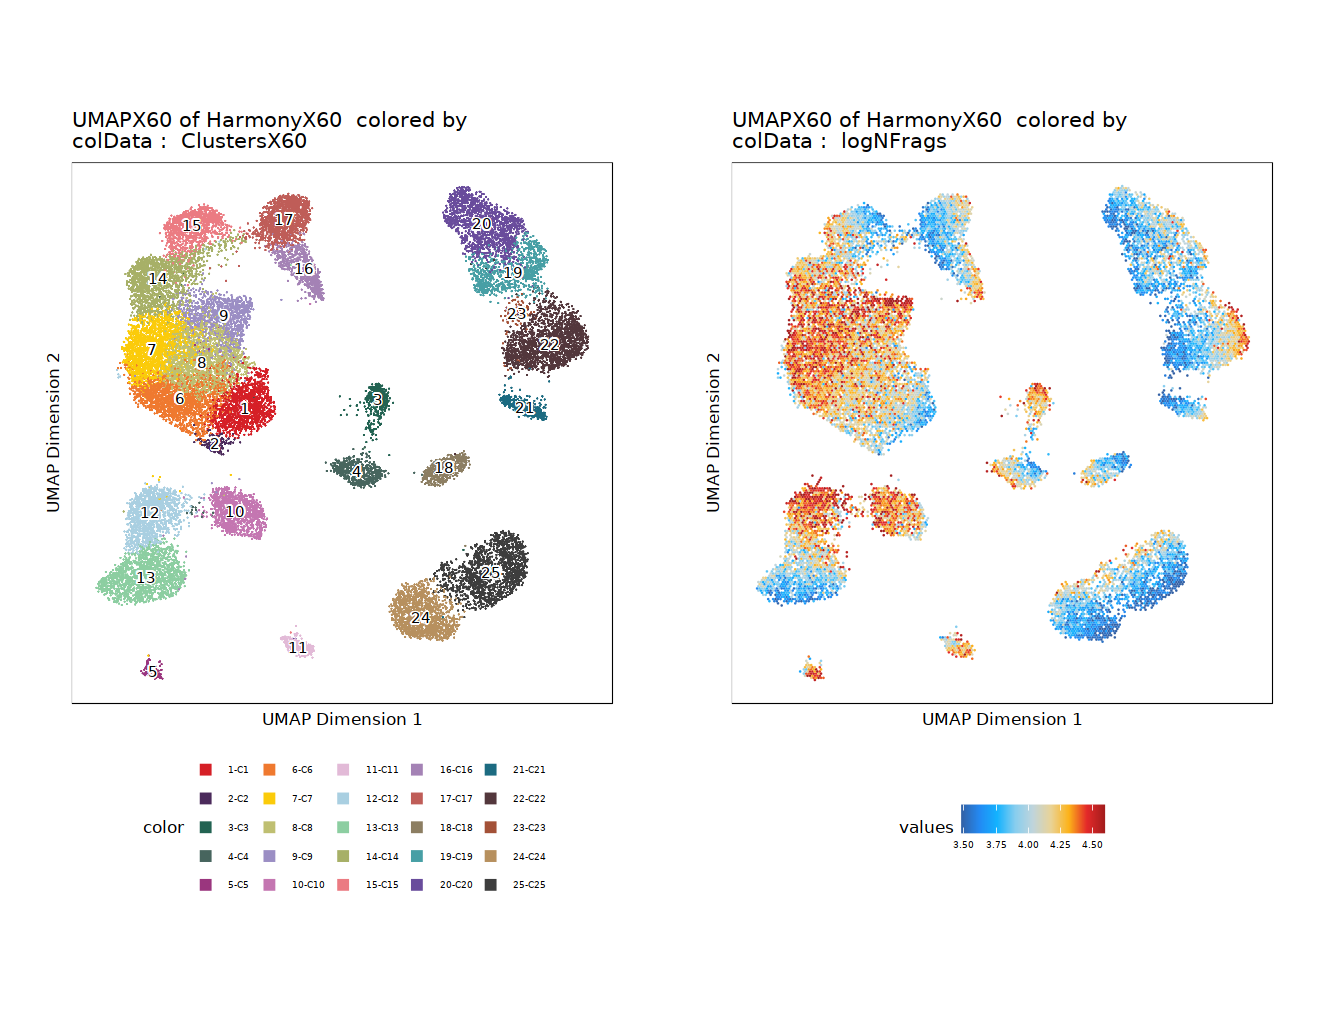

In [5]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersX60", embedding = "UMAPX60")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPX60")
ggAlignPlots(p1, p2, type = "h")


proj$logNFrags = log10(proj$nFrags)
p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPX60")
ggAlignPlots(p1, p3, type = "h")

# Integrate with snRNA-seq from neuronal cell types

In [6]:
SETDIR='../../../data/tidy_data/rdas/JH_PFC_LabeledNuclei_20220104'
rna_sce = readRDS(file.path(SETDIR,'neuron_final.sce.rds'))

In [7]:
head(colData(rna_sce))
table(colData(rna_sce)$cell_type2)
logcounts(rna_sce) = NULL

DataFrame with 6 rows and 28 columns
                                      Sample      Region      Animal     Batch
                                 <character> <character> <character> <numeric>
Oskar_DLPFC-6#AAACCCAAGCCTCAGC Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACCCATCGGAAACG Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACCCATCTCTCGAC Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGAAAGACCAGAC Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGAAGTGAGTCAG Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGCTCAACAGCTT Oskar_DLPFC-6       DLPFC    Monkey_O         6
                               Date.finished.in.Genome.center   Species.name
                                                  <character>    <character>
Oskar_DLPFC-6#AAACCCAAGCCTCAGC                         1/1/19 Rhesus Macaque
Oskar_DLPFC-6#AAACCCATCGGAAACG                         1/1/19 Rhesus Macaque
Oskar_DLPFC-6#AAACCCATC


L2.CUX2.MEIS2  L3.CUX2.RORB    L4.5.TBX15       L4.ALPL        L4.TYR 
         6557          1284           805          2400           644 
   L5.6.NR4A2       L5.PCP4     L5.POU3F1      L6.ITGA8       L6.NKD1 
          289           390           268          1193           463 
      L6.SYT6         LAMP5          NDNF         PV.BC        PV.ChC 
          460           762           736          2270           522 
          SST            TH           VIP 
         2115           143          1644 

In [8]:
###################################################################
# split the cells in snATAC and snRNA by Excitatory and Inhibitory
groupList <- SimpleList(
    # Monkey 1
    EXC = SimpleList(
        ATAC = proj$cellNames[grepl('EXC', as.character(proj$Celltype1)) ],
        RNA = colnames(rna_sce)[grepl('Excita_neurons', colData(rna_sce)$cell_class)]),
    INH = SimpleList(
        ATAC = proj$cellNames[grepl('INH', proj$Celltype1) ],
        RNA = colnames(rna_sce)[grepl('Interneurons', colData(rna_sce)$cell_class)]))

In [10]:
#####################################
# integration split by tissue region
proj <- addGeneIntegrationMatrix(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "HarmonyX60",
    seRNA = rna_sce,  nGenes = 2000, 
    addToArrow = FALSE, plotUMAP = FALSE,
    groupList = groupList,
    groupRNA = "cell_type2",
    nameCell = "predictedCell_RNA2ATACCo",
    nameGroup = "predictedGroup_RNA2ATACCo",
    nameScore = "predictedScore_RNA2ATACCo"
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-457e6cf90ab1-Date-2022-01-07_Time-14-15-21.log
If there is an issue, please report to github with logFile!

2022-01-07 14:15:21 : Running Seurat's Integration Stuart* et al 2019, 0.004 mins elapsed.

2022-01-07 14:15:22 : Checking ATAC Input, 0.014 mins elapsed.

2022-01-07 14:15:22 : Checking RNA Input, 0.014 mins elapsed.

2022-01-07 14:15:58 : Found 18187 overlapping gene names from gene scores and rna matrix!, 0.622 mins elapsed.

2022-01-07 14:15:58 : Creating Integration Blocks, 0.622 mins elapsed.

2022-01-07 14:15:59 : Prepping Interation Data, 0.627 mins elapsed.

2022-01-07 14:16:00 : Computing Integration in 3 Integration Blocks!, 0 mins elapsed.

2022-01-07 14:38:08 : Completed Integration with RNA Matrix, 22.125 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addGeneIntegrationMatrix-457e6cf90ab1-Date-2022-01-07_Time-14-15-21.log



# Compare snATAC clusters w/ snRNA clusters

preClust,
L2.CUX2.MEIS2,C1
L6.ITGA8,C10
L5.6.NR4A2,C11
L4.ALPL,C12
L4.ALPL,C13
L3.CUX2.RORB,C14
L4.TYR,C15
L4.5.TBX15,C16
L4.5.TBX15,C17
L5.PCP4,C18


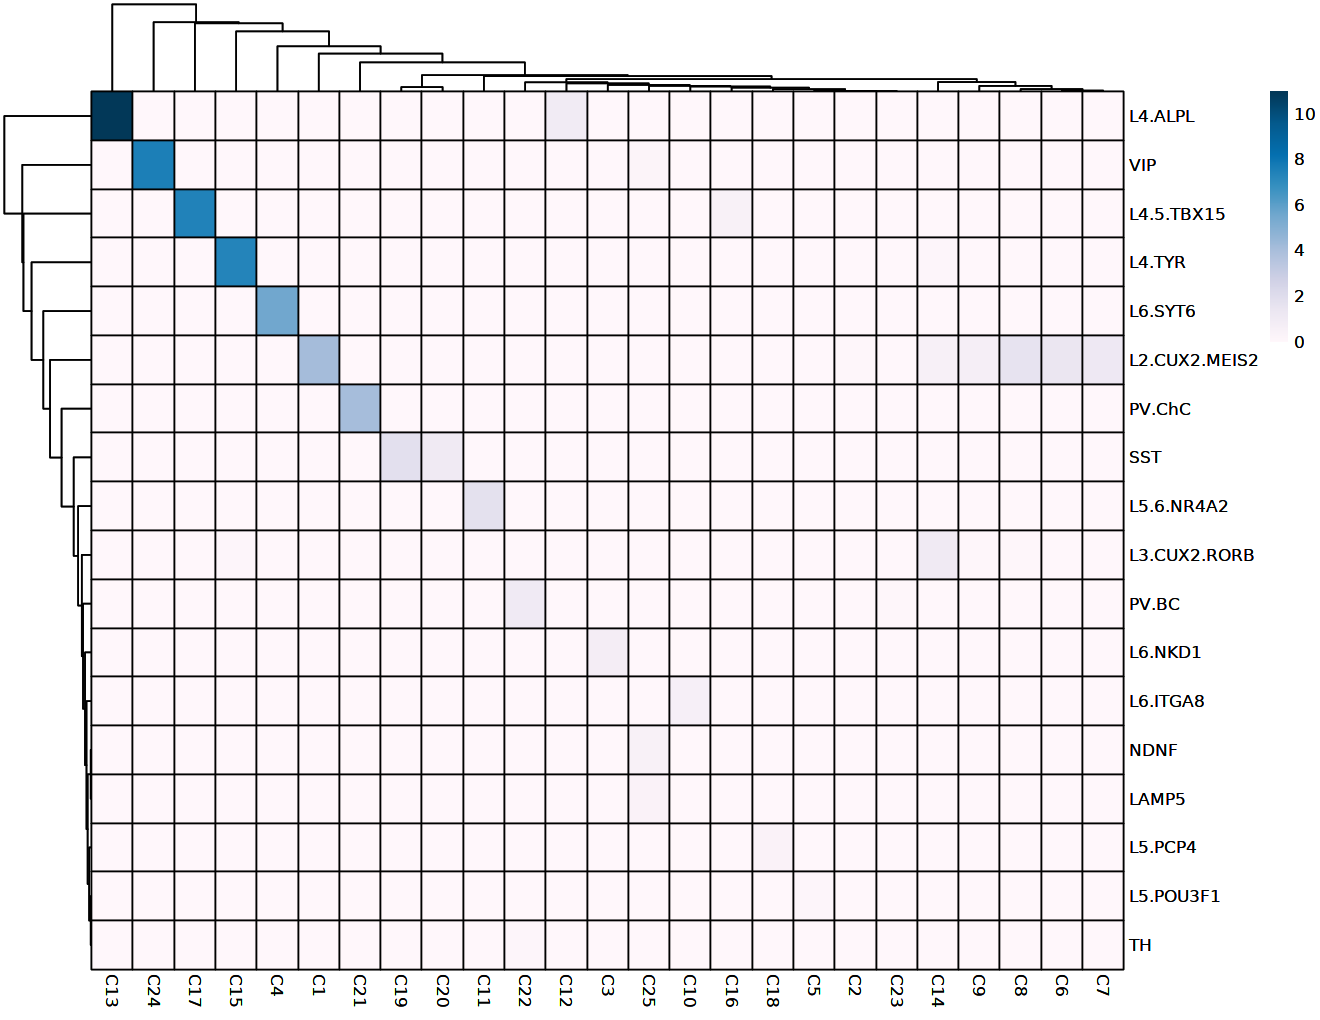

In [11]:
# plot the confusion matrix of cell types by predicted cell type clusters
cM <- confusionMatrix(paste0(proj$predictedGroup_RNA2ATACCo), paste0(proj$ClustersX60))
cM <- cM / Matrix::colSums(cM)
cM = cM[,order(colnames(cM))]
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

preClust <- rownames(cM)[apply(cM, 2 , which.max)]
cbind(preClust, colnames(cM)) #Assignments

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-457e8d8236f-Date-2022-01-07_Time-14-42-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-457e8d8236f-Date-2022-01-07_Time-14-42-44.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-457ecd6a9b7-Date-2022-01-07_Time-14-42-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-457ecd6a9b7-Date-2022-01-07_Time-14-42-45.log



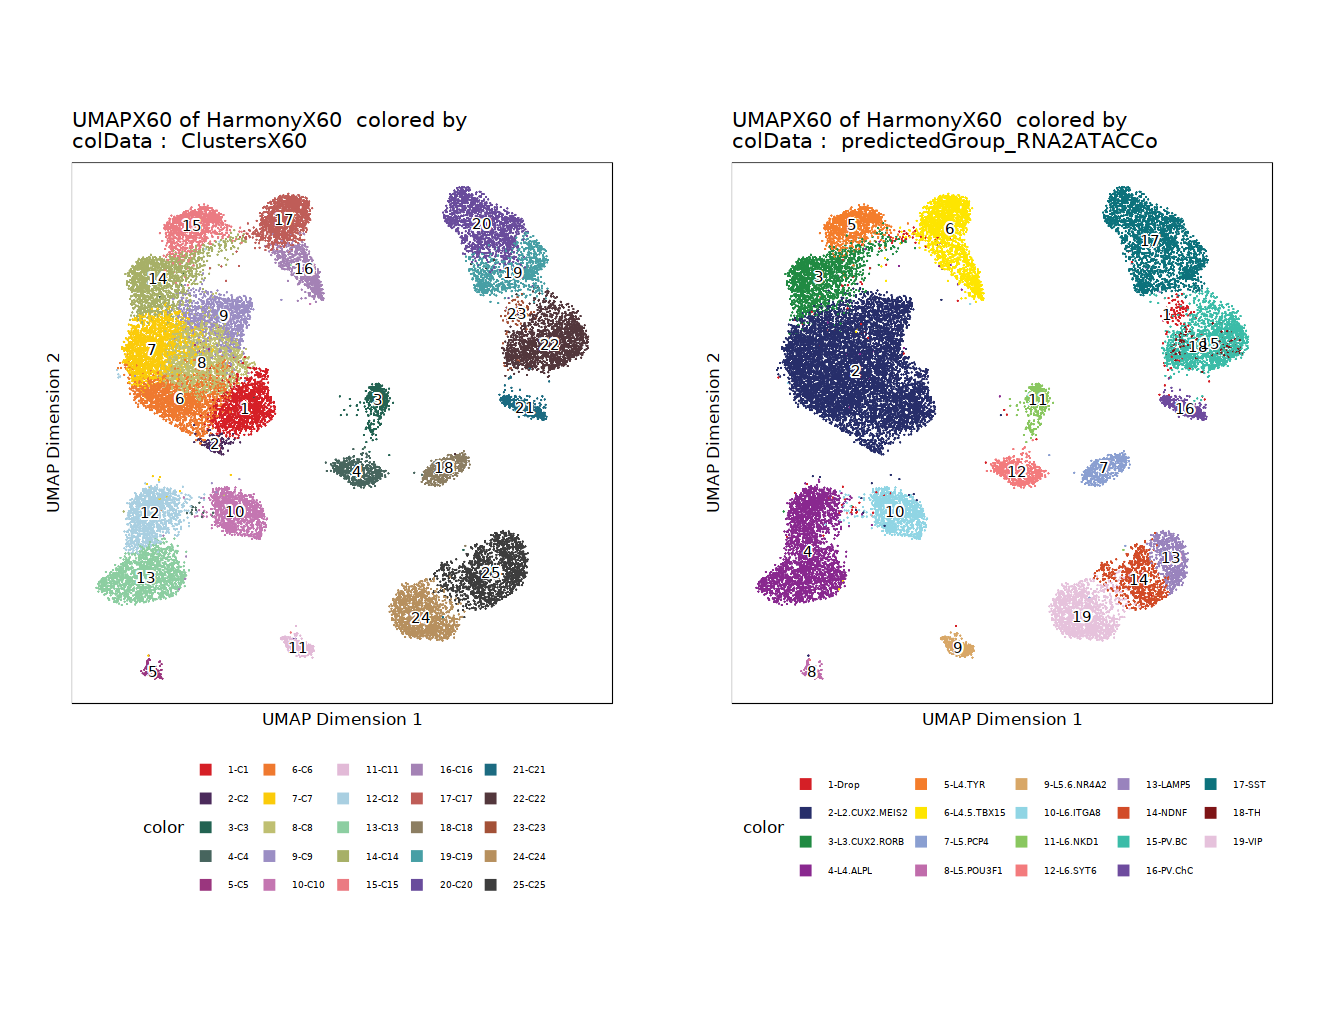

In [13]:
## rename the junk cluster and doublet cluster
indDrop = which(proj$ClustersX60 %in% c('C23') | proj$predictedScore_RNA2ATACCo < 0.5 )
proj$predictedGroup_RNA2ATACCo[indDrop] = 'Drop'

p2 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo", embedding = "UMAPX60")
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "ClustersX60", embedding = "UMAPX60")

ggAlignPlots(p3, p2, type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-457e139de90-Date-2022-01-07_Time-14-43-50.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-01-07 14:43:51 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-457e139de90-Date-2022-01-07_Time-14-43-50.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. 

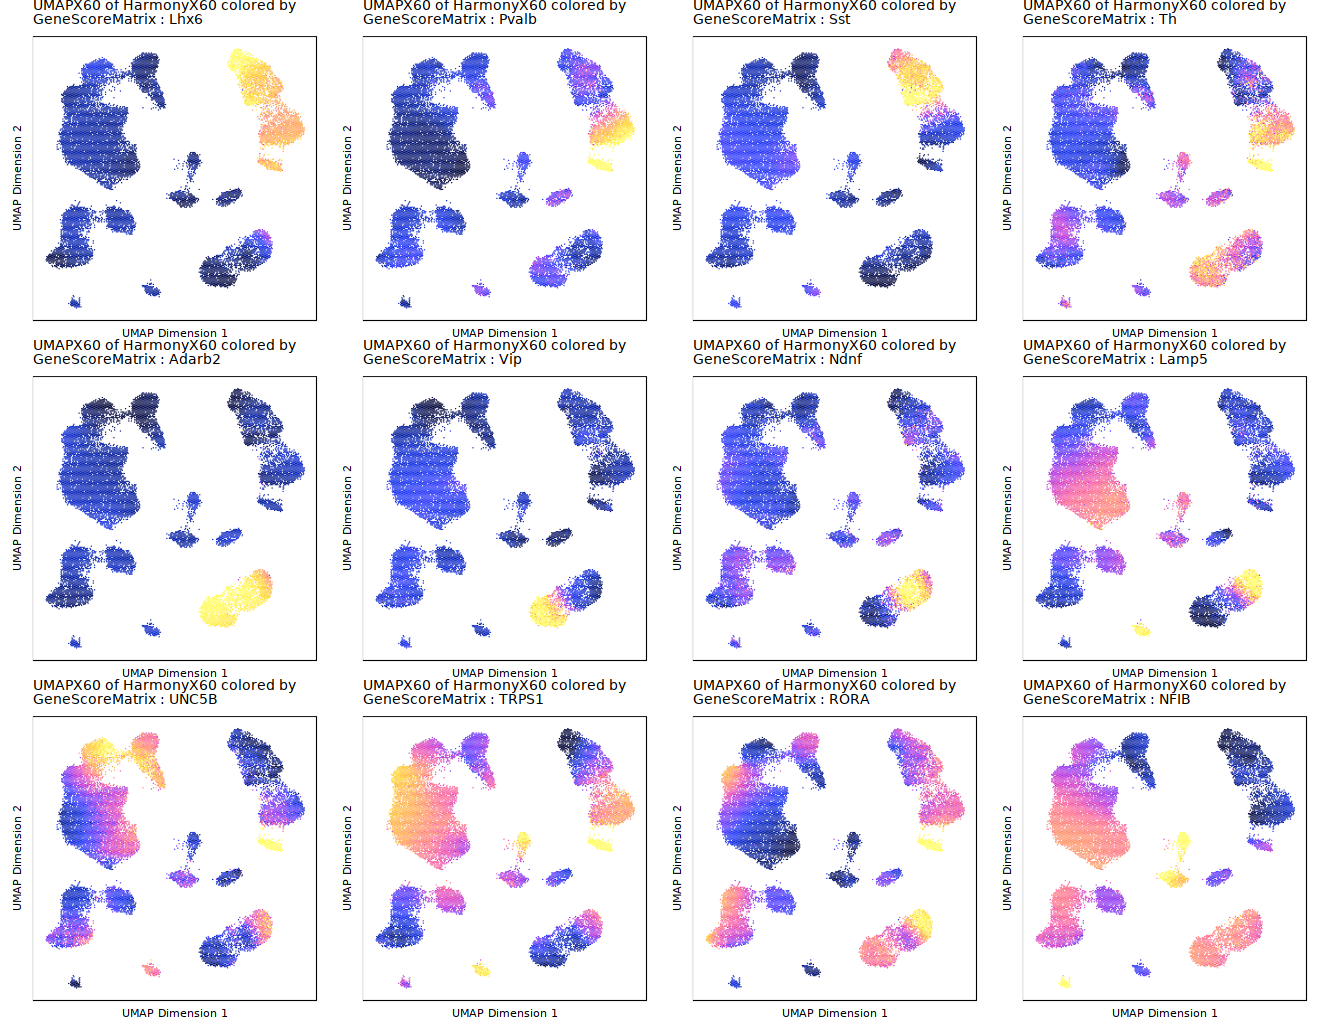

In [14]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'Sst', 'Th', # MGE markers
                    'Adarb2', 'Vip', 'Ndnf', 'Lamp5', # CGE markers
                  'UNC5B', 'TRPS1', 'RORA', 'NFIB') # Chandelier markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX60")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 3),p))

In [16]:
# drop the UNK cluster
idxSample <- BiocGenerics::which(proj$predictedGroup_RNA2ATACCo %ni% c('Drop'))
table(proj$predictedGroup_RNA2ATACCo[idxSample])
cellsSample <- proj$cellNames[idxSample]
proj = subsetCells(ArchRProj = proj, cellNames = cellsSample)
proj = saveArchRProject(ArchRProj = proj)


L2.CUX2.MEIS2  L3.CUX2.RORB    L4.5.TBX15       L4.ALPL        L4.TYR 
         8047          1620          1967          2907          1039 
   L5.6.NR4A2       L5.PCP4     L5.POU3F1      L6.ITGA8       L6.NKD1 
          316           486           170          1137           445 
      L6.SYT6         LAMP5          NDNF         PV.BC        PV.ChC 
          541           635           792          1678           394 
          SST            TH           VIP 
         2366           136          1443 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         